In [13]:
# importing Libraries : 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [14]:
df2=pd.read_csv('Cleaned_Data3.csv')
df2.head()

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
X = df2.drop(columns=['response_binary'])
y = df2['response_binary']

In [21]:
# Checking the percentage of the categories of the target variable: 

yes_count = sum(df2['response_binary'] ==1)
no_count = sum(df2['response_binary'] ==0)

total_count = len(df2)

print(f"percentage of yes: ", ((yes_count)/total_count)*100)
print(f"percentage of no: ", ((no_count)/total_count)*100)

percentage of yes:  11.638066927892627
percentage of no:  88.36193307210736


As we can see above we have only 11% of class 'yes' , which causes class imbalance problem . Here as the minority class (yes) is very small compared to majority class (no) , Oversampling would be one of the way forward to tackle this problem.

Which brings us to Synthetic Minority Over-sampling Technique (SMOTE) which is implemented in 'imbalanced-learn' package , is a way to balance imbalanced datasets.

Instead of just copying the minority class examples, SMOTE creates new synthetic examples by blending together existing ones. This helps prevent the model from focusing too much on the minority class. The big advantage of SMOTE is that it gives a more accurate picture of the minority class, which can make the model perform better, especially when the minority class is rare. 

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled,y_resampled = smote.fit_resample(X,y)


# Concatenate the resampled X and y : 

resampled_df = pd.concat([X_resampled,y_resampled],axis=1)

In [24]:
yes_count = (resampled_df['response_binary'] == 1).sum()
no_count = (resampled_df['response_binary'] == 0).sum()

total_count = len(resampled_df)

print(f"percentage of yes: ", ((yes_count)/total_count)*100)
print(f"percentage of no: ", ((no_count)/total_count)*100)

percentage of yes:  50.0
percentage of no:  50.0


As we can see above our data is balanced perfectly there are no minority class now , we can proceed to train our model on the data

In [42]:
# Splitting the Resampled data : 

X_resampled = resampled_df.drop('response_binary',axis=1)
y_resampled = resampled_df['response_binary']


X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape, y_train.shape)

(62780, 21) (62780,)


After experimenting with different models , I went with Random Forest as it was the best performing model : 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

# Initializing the Random Forest Model : 
clf = RandomForestClassifier(n_estimators=200 , random_state=42 , max_depth = 20 , min_samples_leaf = 1 , min_samples_split=2)


In [ ]:
# Training the model
clf.fit(X_train,y_train)

In [46]:
# Testing the model
y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7832
           1       0.92      0.89      0.91      7864

    accuracy                           0.91     15696
   macro avg       0.91      0.91      0.91     15696
weighted avg       0.91      0.91      0.91     15696



<AxesSubplot: >

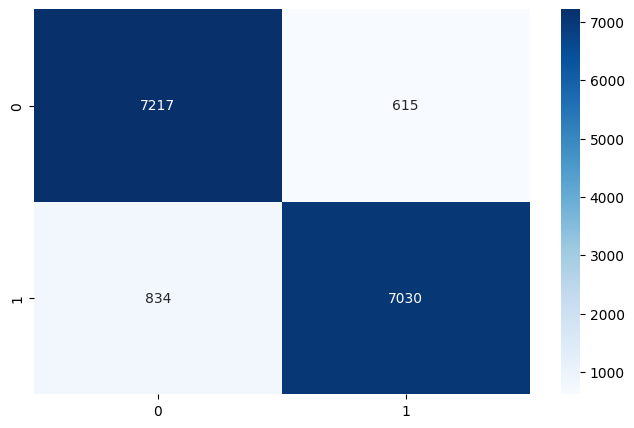

In [48]:
# plotting the confusion matrix : 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True , cmap='Blues',fmt='g')

#### The confusion matrix we have here gives us a good look at how well our model is doing. 

#### It tells us that our model is pretty accurate, with about 90% precision for class 0 and 92% for class 1. When it comes to finding the actual positive cases, it's doing quite well too, with recall rates of 92% for class 0 and 89% for class 1. 

#### The F1-score, which combines precision and recall, is also solid at 91% for both classes, showing a nice balance between them. Overall, the model gets about 91% of the classifications right. So, based on these results, we can say our model is doing a reliable job in classifying instances in our dataset.